In [1]:
import pandas as pd
import numpy as np

import matplotlib as m_plt
from matplotlib import pyplot as plt

from copy import copy
from pprint import pprint

import sys
import os
#from sklearn import datasets

# Practica I - Data Exploration

## 1.- Data 1 - Boston House Pricing

### 1.1.- Retrieving Data

#### 1.1.1.- Reading Data

In [2]:
try :
    boston_dataset = pd.read_csv("./boston/housing.data", sep="\t", header=None)
    boston_dataset.columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
except:
    print("ERROR, DATA NOT LOADED")
else:
    print("""DATA SUCCESSFULLY LOADED\n
    \tRows\t:\t{:d}\t|\tColumns\t:\t{:d}""".format(boston_dataset.shape[0], boston_dataset.shape[1]))

DATA SUCCESSFULLY LOADED

    	Rows	:	506	|	Columns	:	14


#### 1.1.2.- Data Labels
0. **CRIM**      :  *per capita crime rate by town*
2. **ZN**        :  *proportion of residential land zoned for lots over 25,000 sq.ft.*
3. **INDUS**     :  *proportion of non-retail business acres per town*
4. **CHAS**      :  *Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)*
5. **NOX**       :  *nitric oxides concentration (parts per 10 million)*
6. **RM**        :  *average number of rooms per dwelling*
7. **AGE**       :  *proportion of owner-occupied units built prior to 1940*
8. **DIS**       :  *weighted distances to five Boston employment centres*
9. **RAD**       :  *index of accessibility to radial highways*
10. **TAX**      :  *full-value property-tax rate per \$10 000*
11. **PTRATIO**  :  *pupil-teacher ratio by town*
12. **B**        :  *1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town*
13. **LSTAT**    :  *\% lower status of the population*
14. **MEDV**     :  *Median value of owner-occupied homes in \$1000's*

#### 1.1.3.- Viewing Data

In [3]:
boston_dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


### 1.2.- Attributes Choose

#### 1.2.1.- Choosed Attributes and Hypothesis

**Hypothesis** : The houses near to the industrial center are more expensive because being Boston a mainly industrial center (at that time) far places implies more time expended traveling to there.

**Attributes**

* **ZN (id 1)**        :  *proportion of residential land zoned for lots over 25,000 sq.ft.*
    > Available Places Criteria I, Supply
* **RM (id 5)**        :  *average number of rooms per dwelling*
    > Available Places Criteria II, Supply
* **DIS (id 7)**       :  *weighted distances to five Boston employment centres*
    > "Nearly to" Criteria, Demand
* **RAD (id 8)**       :  *index of accessibility to radial highways*
    > Variable who affects directly in the traveling time, Demand.
* **MEDV (id 13)**     :  *Median value of owner-occupied homes in \$1000's*
    > Affects directly in the rent value, Expensiveness.

#### 1.2.2.- Selecting Data

In [4]:
case_data_Boston = boston_dataset.iloc[:,[1, 5, 7, 8, 13]].copy()
case_data_Boston.columns

Index(['ZN', 'RM', 'DIS', 'RAD', 'MEDV'], dtype='object')

### 1.3 Data Exploration

In [5]:
def dummy_DataFrame_plotter(dataFrame_dummy,
                            plot_size=(15,15),
                            grid_subplot=[3,3],
                            mixed_style=False,
                            plot_style='', 
                            grid=False, 
                            have_lines=False, 
                            constant_values=[]):
    
    plt.figure(figsize=plot_size)
    
    for column_id in range(dataFrame_dummy.shape[1]):
        
        temp_obj = plt.subplot(grid_subplot[0],grid_subplot[1], column_id + 1)
        
        temp_obj.set_title(dataFrame_dummy.columns[column_id] + "    [Id   : {:d}]".format(column_id))
        
        if mixed_style:
            for temp_style in plot_style:
                temp_obj.plot(dataFrame_dummy.iloc[:, column_id], temp_style)
        else:
            temp_obj.plot(dataFrame_dummy.iloc[:, column_id], plot_style)
        
        if grid:
            temp_obj.grid()
        else:
            pass
        
        if have_lines:
            try:
                for temp_constant in constant_values[column_id]:
                    temp_obj.plot(temp_constant * np.ones((dataFrame_dummy.shape[0])), 'r')
            except:
                temp_obj.plot(constant_values[column_id] * np.ones((dataFrame_dummy.shape[0])), 'r')
            else:
                pass
    return plt

def dummy_Histogram_plotter(histogram_container,
                            plot_size=(15,15),
                            grid_subplot=[3,3]):
    
    plt.figure(figsize=plot_size)
    
    for plot_id in range(len(histogram_container)):
        
        temp_obj = plt.subplot(grid_subplot[0],grid_subplot[1], plot_id + 1)
        
        temp_obj.set_title("[Id   : {:d}]".format(plot_id))
        
        temp_bins = histogram_container[plot_id][1]
        
        temp_color = m_plt.colors.Colormap(name="temp_color", N=len(temp_bins))
        
        temp_obj.bar( height=histogram_container[plot_id][0], 
                     x=temp_bins
                    )
    return plt

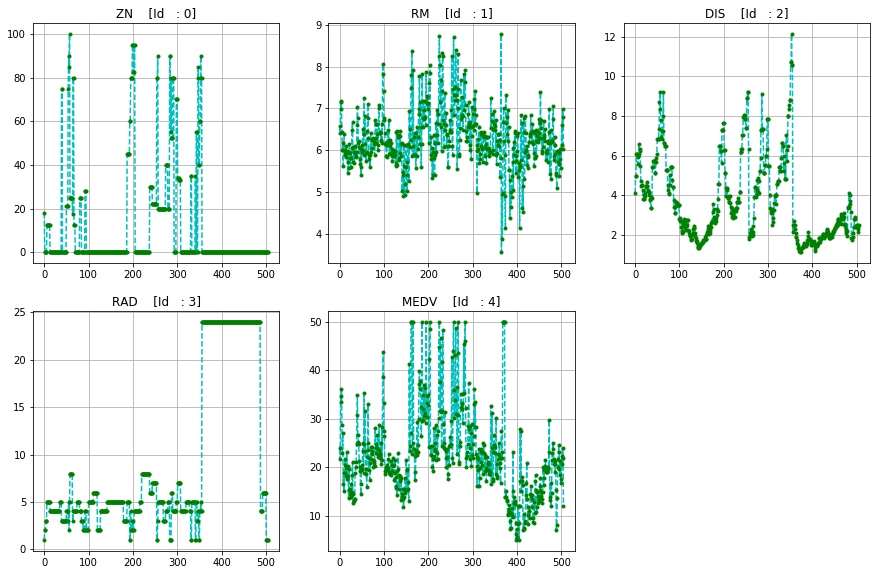

In [6]:
tmp_plt = dummy_DataFrame_plotter(case_data_Boston,
                        plot_size=(15,15), 
                        mixed_style=True,
                        plot_style=["c--", "g."], 
                        grid=True)

#### 1.3.1 Mean

In [7]:
mean_Boston = case_data_Boston.mean().copy()

##### PLOT

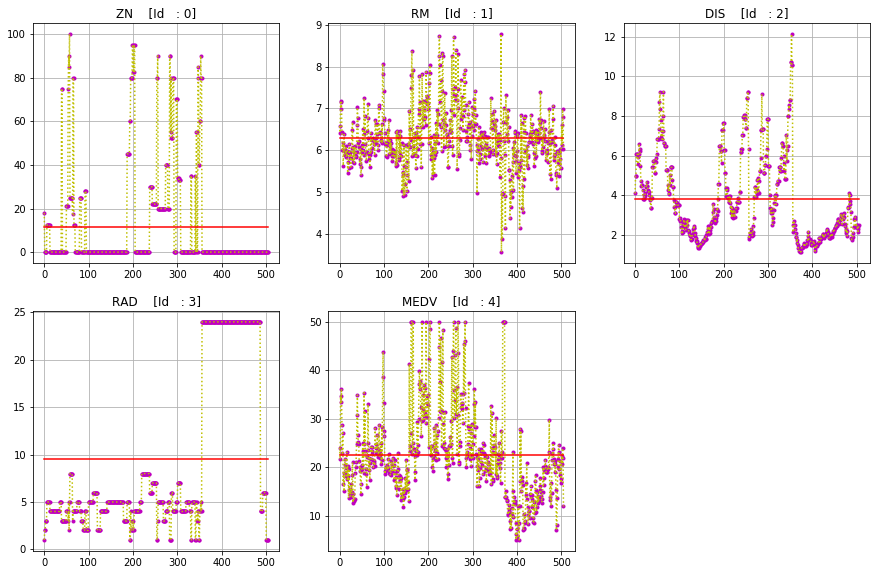

In [8]:
dummy_DataFrame_plotter(case_data_Boston,
                        plot_size=(15,15),
                        mixed_style=True,
                        plot_style=['m.', 'y:'],
                        grid=True,
                        have_lines=True,
                        constant_values=mean_Boston.values).show()


#### 1.3.2 Median

In [9]:
median_Boston = case_data_Boston.median()
print(median_Boston)

ZN       0.00000
RM       6.20850
DIS      3.20745
RAD      5.00000
MEDV    21.20000
dtype: float64


##### PLOT

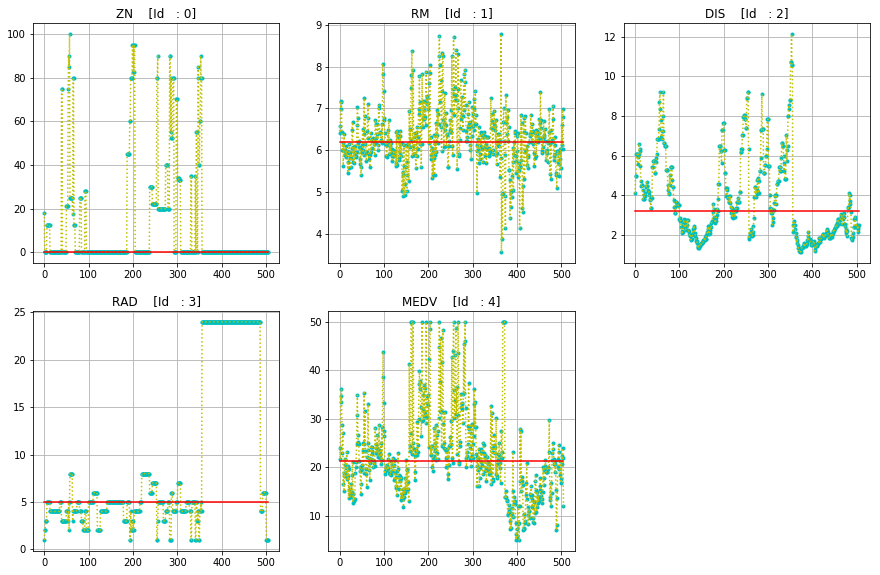

In [10]:
dummy_DataFrame_plotter(case_data_Boston,
                        plot_size=(15,15),
                        mixed_style=True,
                        plot_style=['c.', 'y:'],
                        grid=True,
                        have_lines=True,
                        constant_values=median_Boston.values).show()


#### 1.3.3 Mode

In [17]:
mode_Boston = case_data_Boston.mode(axis=1, numeric_only=True).copy()

histogram_container = []
for id_columns in range(mode_Boston.shape[1]):
    temp_bins, temp_ocurr = np.unique(mode_Boston.dropna().iloc[:, id_columns], 
                                              return_counts=True)
    
    histogram_container.append([copy(temp_ocurr), copy(temp_bins)])

##### PLOT

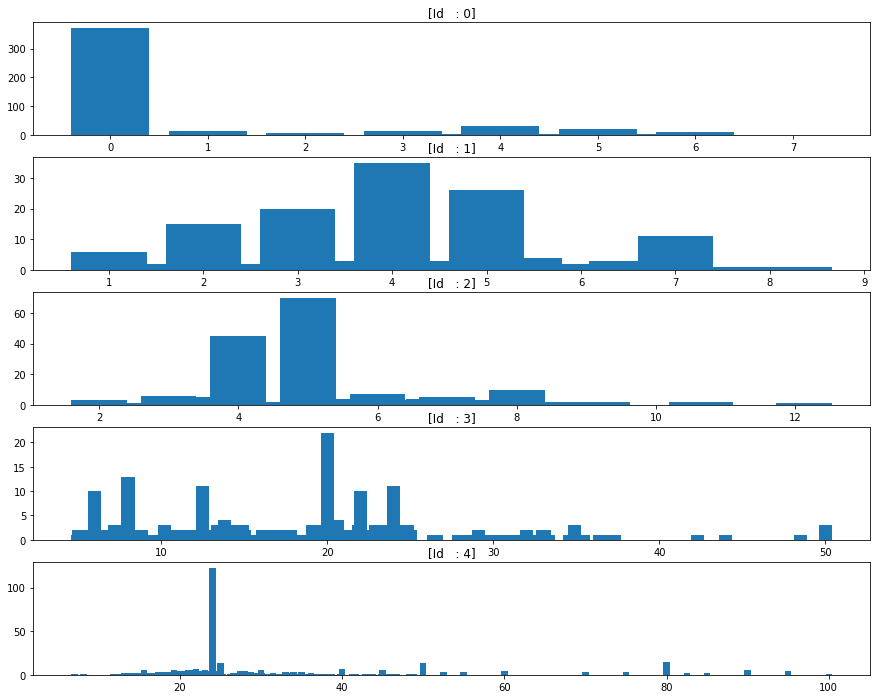

In [18]:
dummy_Histogram_plotter(histogram_container, grid_subplot=[5,1], plot_size=(15,12)).show()

##### 1.3.4 Quantile

In [ ]:
quantile_n = 5
quantile_container = []
for ii in range(quantile_n):
    quantile_float = ((ii + 1.0) / quantile_n)
    quantile_container.append(case_data_Boston.quantile(q=quantile_float, axis=0).values)

##### PLOT

In [ ]:
dummy_DataFrame_plotter(case_data_Boston,
                        plot_size=(15,15),
                        grid=True,
                        plot_style='+',
                        have_lines=True,
                        constant_values=quantile_container).show()


#### 1.3.5 Unique

In [ ]:
unique_container = []
for id_columns in range(case_data_Boston.shape[1]):
    unique_temp = np.unique(case_data_Boston.dropna().iloc[:, id_columns])
    unique_container.append(unique_temp)

##### PLOT

In [ ]:
dummy_DataFrame_plotter(case_data_Boston,
                        grid_subplot=[1,5],
                        plot_size=(20,15),
                        grid=True,
                        mixed_style=True,
                        plot_style=['go', ':'],
                        have_lines=True,
                        constant_values=unique_container).show()

#### 1.3.6 General Description

In [ ]:
case_data_Boston.describe(percentiles=None, include=None, exclude=None)

### 1.4 Hypotesis Related Questions and Answers

#### 1.4.1 The more close residential center are from Indutrial Center, the more dense are ?

#### 1.4.2 [1.4.1] The more close, the more accesible is?

#### 1.4.3 The rent increase the more nearly you are?

_ _ _

___

_ _ _

## 1.- Data 1 - Boston House Pricing

### 1.1.- Retrieving Data

#### 1.1.1.- Reading Data

In [2]:
try :
    boston_dataset = pd.read_csv("./boston/housing.data", sep="\t", header=None)
    boston_dataset.columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
except:
    print("ERROR, DATA NOT LOADED")
else:
    print("""DATA SUCCESSFULLY LOADED\n
    \tRows\t:\t{:d}\t|\tColumns\t:\t{:d}""".format(boston_dataset.shape[0], boston_dataset.shape[1]))

DATA SUCCESSFULLY LOADED

    	Rows	:	506	|	Columns	:	14


#### 1.1.2.- Data Labels
0. **CRIM**      :  *per capita crime rate by town*
2. **ZN**        :  *proportion of residential land zoned for lots over 25,000 sq.ft.*
3. **INDUS**     :  *proportion of non-retail business acres per town*
4. **CHAS**      :  *Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)*
5. **NOX**       :  *nitric oxides concentration (parts per 10 million)*
6. **RM**        :  *average number of rooms per dwelling*
7. **AGE**       :  *proportion of owner-occupied units built prior to 1940*
8. **DIS**       :  *weighted distances to five Boston employment centres*
9. **RAD**       :  *index of accessibility to radial highways*
10. **TAX**      :  *full-value property-tax rate per \$10 000*
11. **PTRATIO**  :  *pupil-teacher ratio by town*
12. **B**        :  *1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town*
13. **LSTAT**    :  *\% lower status of the population*
14. **MEDV**     :  *Median value of owner-occupied homes in \$1000's*

#### 1.1.3.- Viewing Data

In [3]:
boston_dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


### 1.2.- Attributes Choose

#### 1.2.1.- Choosed Attributes and Hypothesis

**Hypothesis** : The houses near to the industrial center are more expensive because being Boston a mainly industrial center (at that time) far places implies more time expended traveling to there.

**Attributes**

* **ZN (id 1)**        :  *proportion of residential land zoned for lots over 25,000 sq.ft.*
    > Available Places Criteria I, Supply
* **RM (id 5)**        :  *average number of rooms per dwelling*
    > Available Places Criteria II, Supply
* **DIS (id 7)**       :  *weighted distances to five Boston employment centres*
    > "Nearly to" Criteria, Demand
* **RAD (id 8)**       :  *index of accessibility to radial highways*
    > Variable who affects directly in the traveling time, Demand.
* **MEDV (id 13)**     :  *Median value of owner-occupied homes in \$1000's*
    > Affects directly in the rent value, Expensiveness.

#### 1.2.2.- Selecting Data

In [4]:
case_data_Boston = boston_dataset.iloc[:,[1, 5, 7, 8, 13]].copy()
case_data_Boston.columns

Index(['ZN', 'RM', 'DIS', 'RAD', 'MEDV'], dtype='object')

### 1.3 Data Exploration

In [5]:
def dummy_DataFrame_plotter(dataFrame_dummy,
                            plot_size=(15,15),
                            grid_subplot=[3,3],
                            mixed_style=False,
                            plot_style='', 
                            grid=False, 
                            have_lines=False, 
                            constant_values=[]):
    
    plt.figure(figsize=plot_size)
    
    for column_id in range(dataFrame_dummy.shape[1]):
        
        temp_obj = plt.subplot(grid_subplot[0],grid_subplot[1], column_id + 1)
        
        temp_obj.set_title(dataFrame_dummy.columns[column_id] + "    [Id   : {:d}]".format(column_id))
        
        if mixed_style:
            for temp_style in plot_style:
                temp_obj.plot(dataFrame_dummy.iloc[:, column_id], temp_style)
        else:
            temp_obj.plot(dataFrame_dummy.iloc[:, column_id], plot_style)
        
        if grid:
            temp_obj.grid()
        else:
            pass
        
        if have_lines:
            try:
                for temp_constant in constant_values[column_id]:
                    temp_obj.plot(temp_constant * np.ones((dataFrame_dummy.shape[0])), 'r')
            except:
                temp_obj.plot(constant_values[column_id] * np.ones((dataFrame_dummy.shape[0])), 'r')
            else:
                pass
    return plt

def dummy_Histogram_plotter(histogram_container,
                            plot_size=(15,15),
                            grid_subplot=[3,3]):
    
    plt.figure(figsize=plot_size)
    
    for plot_id in range(len(histogram_container)):
        
        temp_obj = plt.subplot(grid_subplot[0],grid_subplot[1], plot_id + 1)
        
        temp_obj.set_title("[Id   : {:d}]".format(plot_id))
        
        temp_bins = histogram_container[plot_id][1]
        
        temp_color = m_plt.colors.Colormap(name="temp_color", N=len(temp_bins))
        
        temp_obj.bar( height=histogram_container[plot_id][0], 
                     x=temp_bins
                    )
    return plt

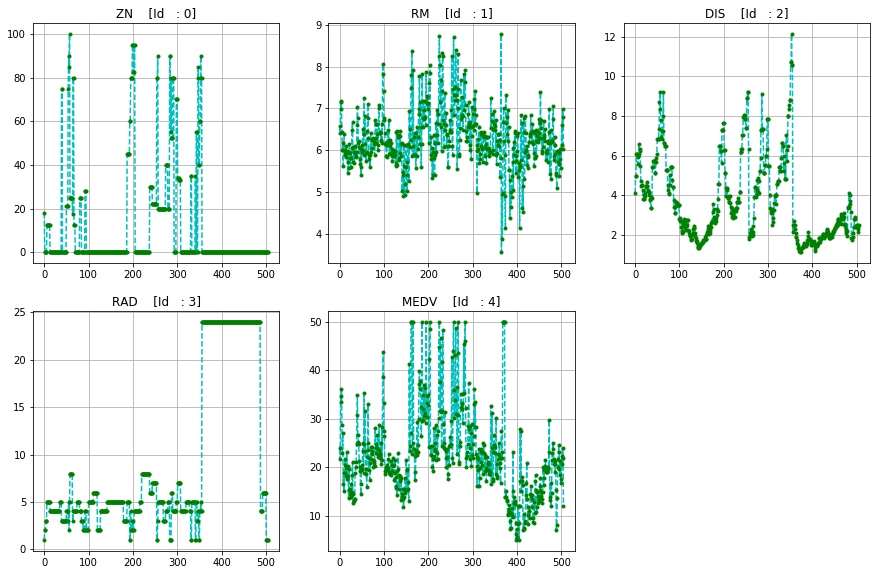

In [6]:
tmp_plt = dummy_DataFrame_plotter(case_data_Boston,
                        plot_size=(15,15), 
                        mixed_style=True,
                        plot_style=["c--", "g."], 
                        grid=True)

#### 1.3.1 Mean

In [7]:
mean_Boston = case_data_Boston.mean().copy()

##### PLOT

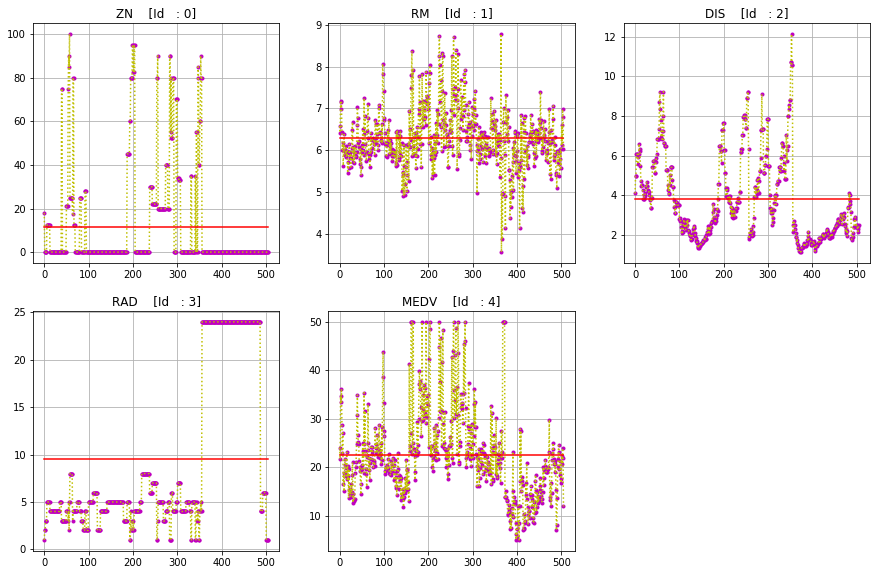

In [8]:
dummy_DataFrame_plotter(case_data_Boston,
                        plot_size=(15,15),
                        mixed_style=True,
                        plot_style=['m.', 'y:'],
                        grid=True,
                        have_lines=True,
                        constant_values=mean_Boston.values).show()


#### 1.3.2 Median

In [9]:
median_Boston = case_data_Boston.median()
print(median_Boston)

ZN       0.00000
RM       6.20850
DIS      3.20745
RAD      5.00000
MEDV    21.20000
dtype: float64


##### PLOT

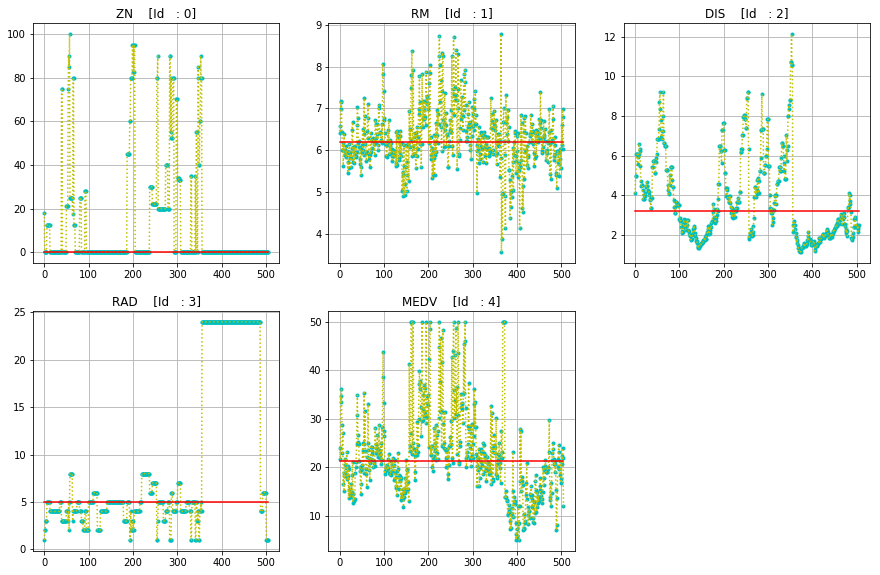

In [10]:
dummy_DataFrame_plotter(case_data_Boston,
                        plot_size=(15,15),
                        mixed_style=True,
                        plot_style=['c.', 'y:'],
                        grid=True,
                        have_lines=True,
                        constant_values=median_Boston.values).show()


#### 1.3.3 Mode

In [17]:
mode_Boston = case_data_Boston.mode(axis=1, numeric_only=True).copy()

histogram_container = []
for id_columns in range(mode_Boston.shape[1]):
    temp_bins, temp_ocurr = np.unique(mode_Boston.dropna().iloc[:, id_columns], 
                                              return_counts=True)
    
    histogram_container.append([copy(temp_ocurr), copy(temp_bins)])

##### PLOT

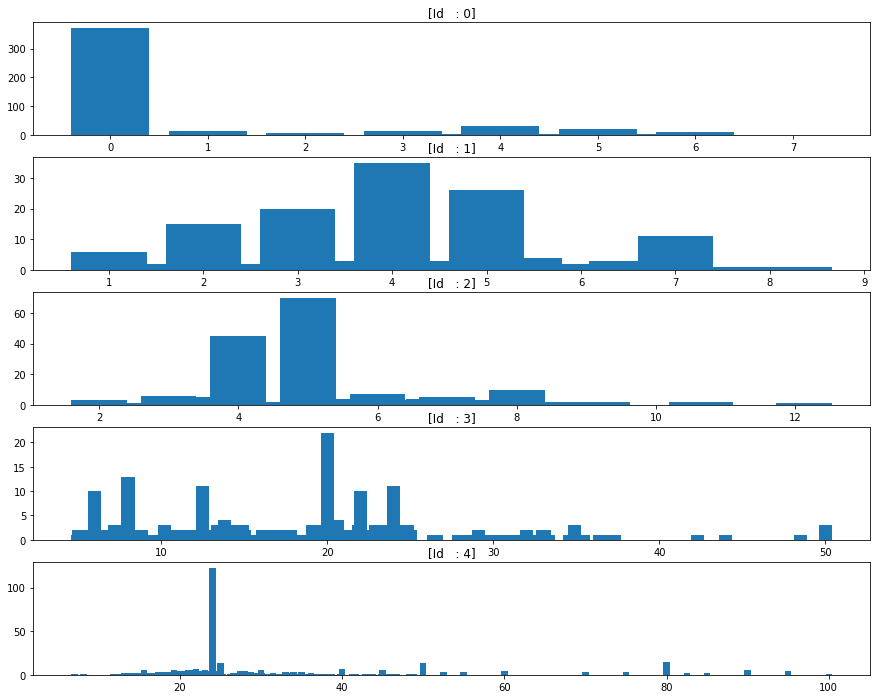

In [18]:
dummy_Histogram_plotter(histogram_container, grid_subplot=[5,1], plot_size=(15,12)).show()

##### 1.3.4 Quantile

In [ ]:
quantile_n = 5
quantile_container = []
for ii in range(quantile_n):
    quantile_float = ((ii + 1.0) / quantile_n)
    quantile_container.append(case_data_Boston.quantile(q=quantile_float, axis=0).values)

##### PLOT

In [ ]:
dummy_DataFrame_plotter(case_data_Boston,
                        plot_size=(15,15),
                        grid=True,
                        plot_style='+',
                        have_lines=True,
                        constant_values=quantile_container).show()


#### 1.3.5 Unique

In [ ]:
unique_container = []
for id_columns in range(case_data_Boston.shape[1]):
    unique_temp = np.unique(case_data_Boston.dropna().iloc[:, id_columns])
    unique_container.append(unique_temp)

##### PLOT

In [ ]:
dummy_DataFrame_plotter(case_data_Boston,
                        grid_subplot=[1,5],
                        plot_size=(20,15),
                        grid=True,
                        mixed_style=True,
                        plot_style=['go', ':'],
                        have_lines=True,
                        constant_values=unique_container).show()

#### 1.3.6 General Description

In [ ]:
case_data_Boston.describe(percentiles=None, include=None, exclude=None)

### 1.4 Hypotesis Related Questions and Answers

#### 1.4.1 The more close residential center are from Indutrial Center, the more dense are ?

#### 1.4.2 [1.4.1] The more close, the more accesible is?

#### 1.4.3 The rent increase the more nearly you are?